# 40 Working with GPX Data in GemGIS

GPX, or GPS Exchange Format, is an XML schema designed as a common GPS data format for software applications. It can be used to describe waypoints, tracks, and routes. The format is open and can be used without the need to pay license fees. Location data (and optionally elevation, time, and other information) is stored in tags and can be interchanged between GPS devices and software. Common software applications for the data include viewing tracks projected onto various map sources, annotating maps, and geotagging photographs based on the time they were taken.

<img src="../images/tutorial40_cover.png">

Source: https://en.wikipedia.org/wiki/GPS_Exchange_Format

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/40_working_with_gpx_data_in_gemgis/'

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gemgis\gemgis.py:27: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="40_working_with_gpx_data_in_gemgis.zip", dirpath=file_path)

## Load Data

Data from a running practice in northern Germany is used for demonstration purposes.

In [3]:
import geopandas as gpd

gpx = gg.vector.load_gpx(path=file_path+'Run.gpx', layer='tracks') 
gpx

<open Collection 'C:\Users\ale93371\Documents\gemgis\docs\getting_started\tutorial\data\40_working_with_gpx_data_in_gemgis\Run.gpx:tracks', mode 'r' at 0x2127ee838b0>

## Inspecting the data

The driver used to open the data was ``GPX``

In [4]:
gpx.driver

'GPX'

The CRS of the data is ``EPGS:4326``.

In [5]:
gpx.crs

{'init': 'epsg:4326'}

In [6]:
gpx.crs_wkt

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

The extent of the data is defining the bounds of the gpx.

In [7]:
gpx.bounds

(8.460906, 52.694879, 8.501507, 52.732331)

Since the track has different start and end points, the track is not closed.

In [8]:
gpx.closed

False

Accessing the meta data.

In [9]:
gpx.meta

{'driver': 'GPX',
 'schema': {'properties': OrderedDict([('name', 'str'),
               ('cmt', 'str'),
               ('desc', 'str'),
               ('src', 'str'),
               ('link1_href', 'str'),
               ('link1_text', 'str'),
               ('link1_type', 'str'),
               ('link2_href', 'str'),
               ('link2_text', 'str'),
               ('link2_type', 'str'),
               ('number', 'int'),
               ('type', 'str')]),
  'geometry': 'MultiLineString'},
 'crs': {'init': 'epsg:4326'},
 'crs_wkt': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'}

Name of the Track.

In [10]:
gpx.name

'tracks'

In [11]:
gpx.profile

{'driver': 'GPX',
 'schema': {'properties': OrderedDict([('name', 'str'),
               ('cmt', 'str'),
               ('desc', 'str'),
               ('src', 'str'),
               ('link1_href', 'str'),
               ('link1_text', 'str'),
               ('link1_type', 'str'),
               ('link2_href', 'str'),
               ('link2_text', 'str'),
               ('link2_type', 'str'),
               ('number', 'int'),
               ('type', 'str')]),
  'geometry': 'MultiLineString'},
 'crs': {'init': 'epsg:4326'},
 'crs_wkt': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'}

## Loading GPX as dict

The GPX can also be loaded as dict for further processing of the contents of the GPX file using ``load_gpx_as_dict(..)``. This dict contains the properties, the geometry including the coordinates of the data, the ID and the type of the data

In [12]:
gpx_dict = gg.vector.load_gpx_as_dict(path=file_path+'Run.gpx', layer='tracks')
gpx_dict['geometry']['coordinates'][0][:5]

[(8.496285, 52.705566),
 (8.49627, 52.705593),
 (8.496234, 52.705629),
 (8.496205, 52.705664),
 (8.496181, 52.705705)]

In [13]:
gpx_dict.keys()

dict_keys(['type', 'id', 'properties', 'geometry'])

In [14]:
gpx_dict['type'], gpx_dict['id'], gpx_dict['properties']

('Feature',
 '0',
 OrderedDict([('name', 'First half marathon distance of the year'),
              ('cmt', None),
              ('desc', None),
              ('src', None),
              ('link1_href', None),
              ('link1_text', None),
              ('link1_type', None),
              ('link2_href', None),
              ('link2_text', None),
              ('link2_type', None),
              ('number', None),
              ('type', '9')]))

In [15]:
gpx_dict['geometry']['type']

'MultiLineString'

## Creating Shapely Base Geometry from GPX

In order to work with GPX data, a Shapely BaseGeometry can be created using ``load_gpx_as_geometry(...)``.


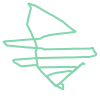

In [16]:
shape = gg.vector.load_gpx_as_geometry(path=file_path+'Run.gpx', layer='tracks')
shape

In [17]:
shape.wkt[:100]

'MULTILINESTRING ((8.496285 52.705566, 8.49627 52.705593, 8.496234 52.705629, 8.496205 52.705664, 8.4'

## Creating GeoData from Geometry

A GeoDataFrame containing the created geometry can easily be created. Notice that the CRS attribute of the GPX collection was provided. 

In [18]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(geometry=[shape], crs=gpx.crs)
gdf

,geometry
0,"MULTILINESTRING ((8.49629 52.70557, 8.49627 52..."


In [19]:
gdf.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

And the data can be plotted.

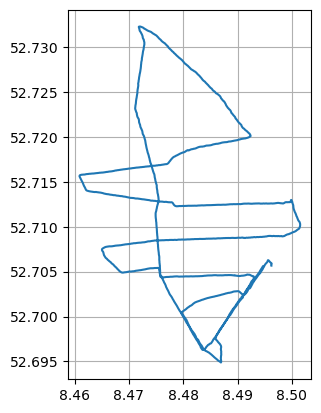

In [20]:
import matplotlib.pyplot as plt

gdf.plot()
plt.grid()

The length of the track is approximately 21139 m and therefore slightly longer than a half marathon distance (21097 m).

In [21]:
gdf.to_crs(4647).loc[0].geometry.length

21139.875974842187